In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest57.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest39.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest54.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest2.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest81.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest70.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest82.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest79.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest23.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest100.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest94.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 - Penyisihan/DataTest72.png
/kaggle/input/data-test-bdc/Data Test for BDC 2023 -

In [2]:
import pandas as pd
import numpy as np

from glob import glob as glob
from tqdm import tqdm as tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use("ggplot")

In [3]:
annot = pd.read_csv("/kaggle/input/datatest/DataTest.csv", sep = ";")

In [4]:
annot.head()

Unnamed: 0   Name of File
0           0  DataTest1.png
1           1  DataTest2.png
2           2  DataTest3.png
3           3  DataTest4.png
4           4  DataTest5.png

In [5]:
annot = annot.drop("Unnamed: 0", axis=1)

In [6]:
annot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name of File  100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [7]:
img_fns = glob("/kaggle/input/test-data-bdc/Data Test for BDC 2023 - Penyisihan/*")

In [8]:
img_fns[0]

'/kaggle/input/test-data-bdc/Data Test for BDC 2023 - Penyisihan/DataTest16.png'

# Plot Example Images


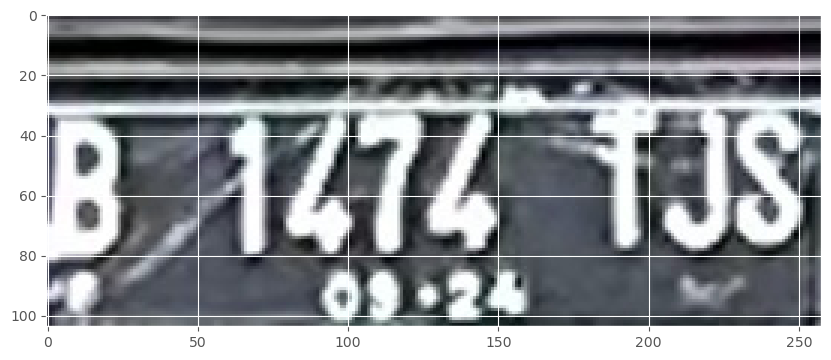

In [9]:
img_id = img_fns[0].split("/")[-1]

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(img_fns[0]))
plt.show()

In [10]:
img_id = img_fns[0].split("/")[-1]
#annot.query("NameofFile == @img_id")

# Display for 25 first images

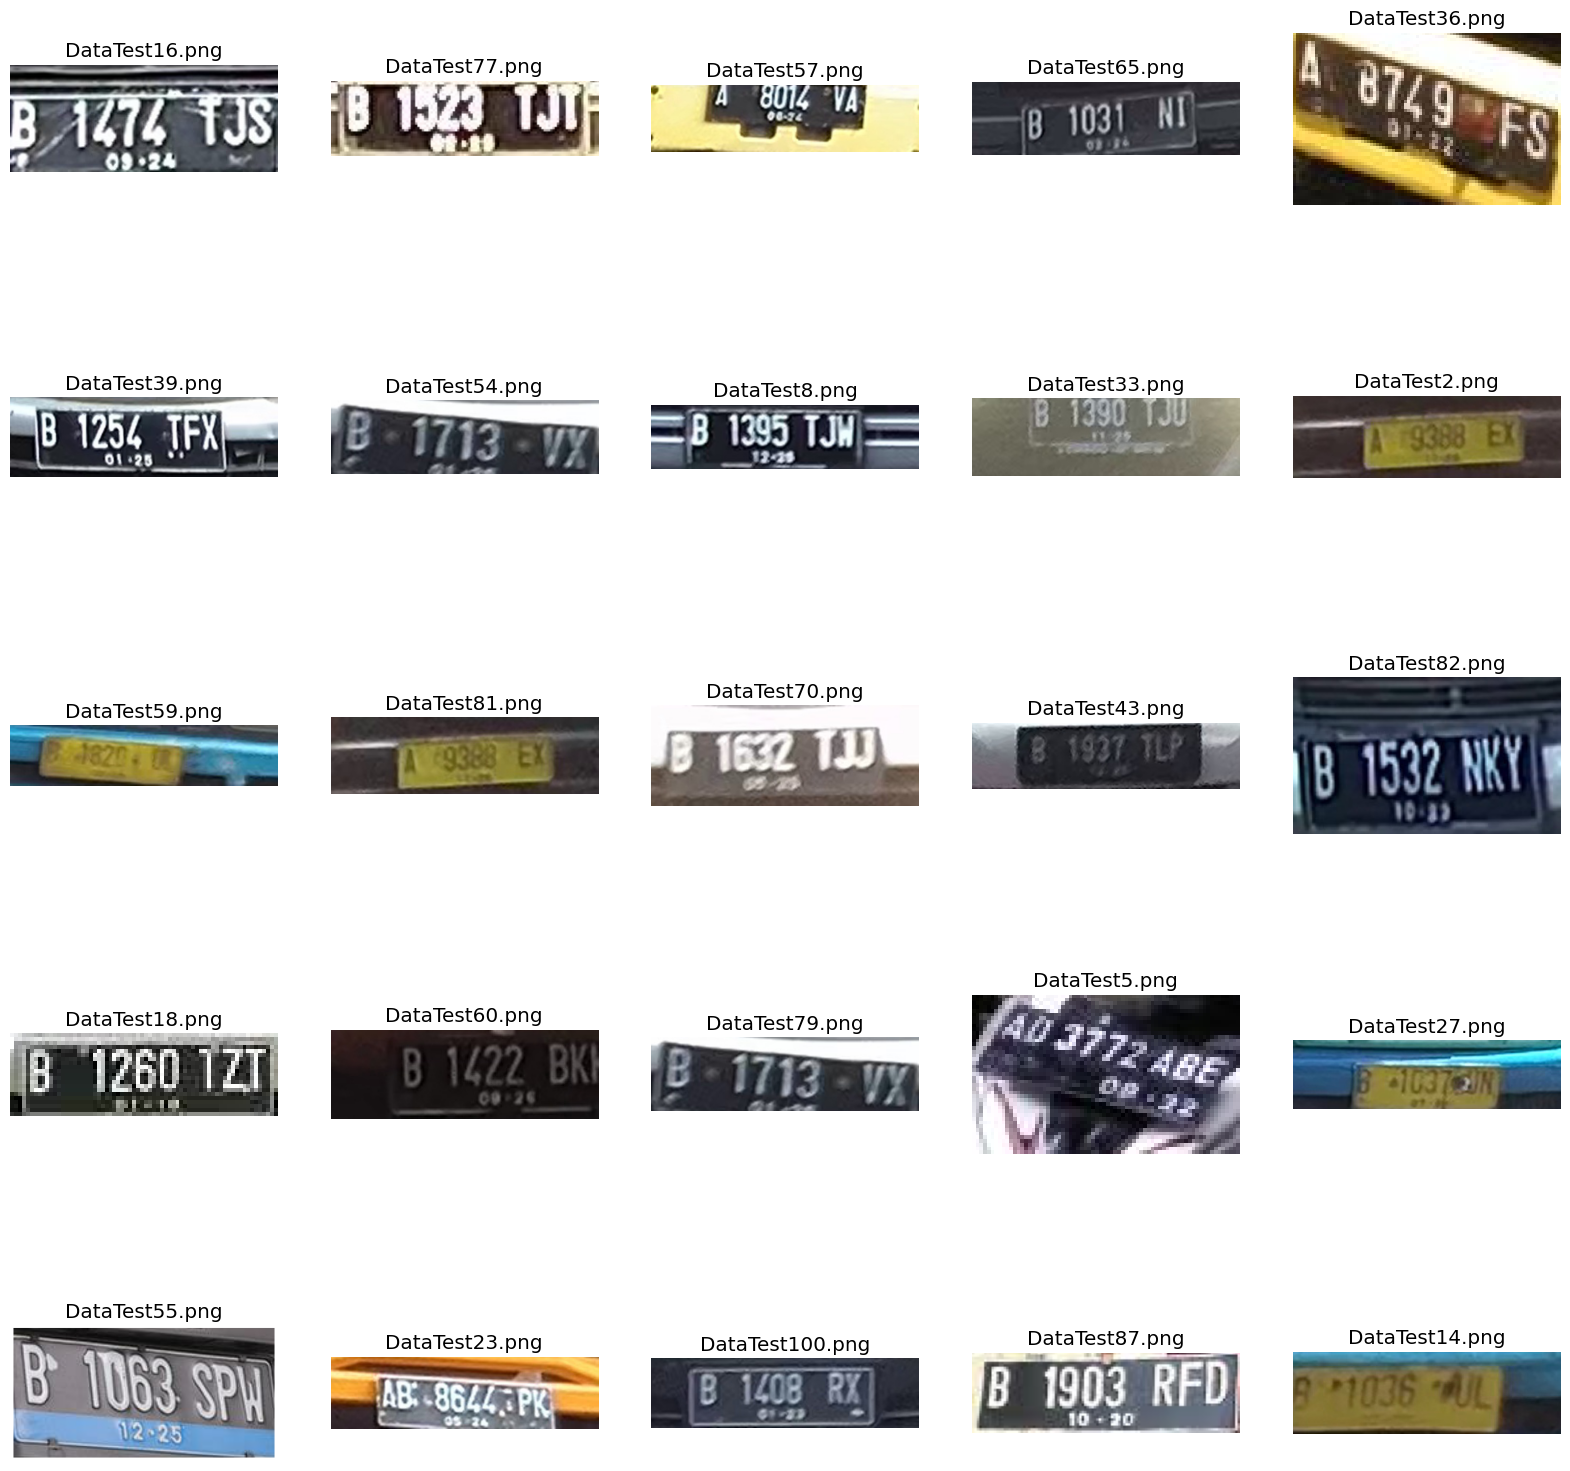

In [11]:
fig, axs = plt.subplots(5,5, figsize=(20,20))
axs = axs.flatten()
for i in range(25):
    axs[i].imshow(plt.imread(img_fns[i]))
    axs[i].axis("off")
    img_id = img_fns[i].split("/")[-1]
    #n_annot = len(annot[annot["NameofFile"] == img_id]["Vehicleregistrationplate"][annot[annot["NameofFile"] == img_id].index[0]])
    axs[i].set_title(f"{img_id}")
plt.show()

# Method 1: Pytesseract

In [12]:
import pytesseract

print(pytesseract.image_to_string(img_fns[7], lang='eng'))

=) AR Al) -——



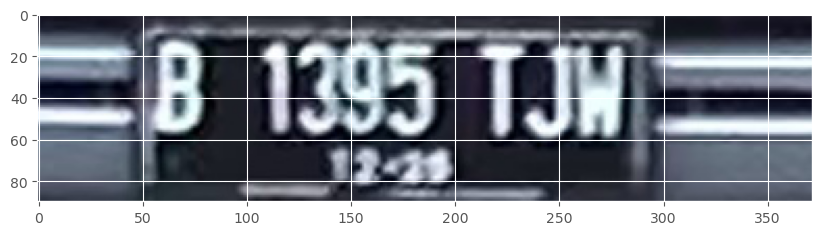

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(img_fns[7]))
plt.show()

# Method 2: easyocr

In [14]:
import easyocr

reader = easyocr.Reader(['en'], gpu = False)

In [15]:
easy_results = reader.readtext(img_fns[7])

In [16]:
pd.DataFrame(easy_results, columns = ['bbox', 'Vehicleregistrationplate', 'conf' ])

bbox Vehicleregistrationplate     conf
0  [[45, 5], [293, 5], [293, 71], [45, 71]]               B 1395 TJM  0.47295

# Method 3: keras_ocr

In [17]:
!pip install keras-ocr -q

In [18]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [19]:
keras_results = pipeline.recognize([img_fns[7]])

1/1 [==============================] - 3s 3s/step


In [20]:
pd.DataFrame(keras_results[0], columns = ['text','bbox'])

text                                               bbox
0    b  [[50.0, 11.0], [82.0, 11.0], [82.0, 58.0], [50...
1  195  [[103.0, 12.0], [196.0, 12.0], [196.0, 61.0], ...
2  tjh  [[210.34453, 12.496544], [285.81836, 14.173744...

<Axes: >

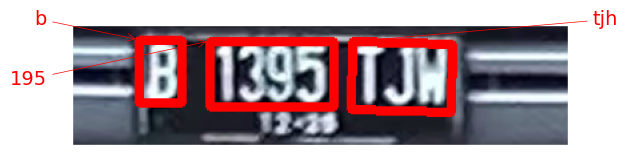

In [21]:
keras_ocr.tools.drawAnnotations(plt.imread(img_fns[7]), keras_results[0])

# Compare easyocr vs. keras_ocr

In [41]:
from PIL import Image, ImageChops

In [50]:
import cv2

In [71]:
reader = easyocr.Reader(['en'], gpu = False)

dfs = []
for img in tqdm(img_fns):
    image = cv2.imread(img)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_75 = cv2.resize(gray_image, None, fx = 1.25, fy = 1.25)
    easy_result = reader.readtext(img_75)
    img_id = img.split("/")[-1]
    img_df = pd.DataFrame(easy_result, columns=['bbox', 'Vehicleregistrationplate', 'conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)

100%|██████████| 100/100 [00:52<00:00,  1.89it/s]


In [72]:
easyocr_df

bbox  \
0          [[0, 24], [322, 24], [322, 120], [0, 120]]   
0              [[0, 0], [151, 0], [151, 35], [0, 35]]   
0          [[110, 0], [136, 0], [136, 36], [110, 36]]   
1          [[182, 0], [286, 0], [286, 52], [182, 52]]   
2          [[307, 0], [369, 0], [369, 57], [307, 57]]   
..                                                ...   
1      [[187, 85], [290, 85], [290, 122], [187, 122]]   
0          [[116, 0], [166, 0], [166, 74], [116, 74]]   
1      [[435, 61], [549, 61], [549, 173], [435, 173]]   
2   [[213.07254990968158, -6.964106165107712], [39...   
3   [[279.40077848228805, 110.04513798310093], [39...   

   Vehicleregistrationplate      conf          img_id  
0               B Az77" TJS  0.119829  DataTest16.png  
0               IB 1523 1Ji  0.105747  DataTest77.png  
0                         4  0.296828  DataTest57.png  
1                      8014  0.386994  DataTest57.png  
2                        VA  0.650755  DataTest57.png  
..                      ...       ...             ...  
1                        06  0.550233   DataTest4.png  
0                         8  0.987341  DataTest17.png  
1                        PU  0.986198  DataTest17.png  
2                      1939  0.995411  DataTest17.png  
3                       Cet  0.011856  DataTest17.png  

[198 rows x 4 columns]

In [73]:
char = ["0","1","2","3","4","5","6","7","8","9","A","B",'C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
image_id = []
list_plate = []
for img in tqdm(img_fns):
    plate = ''
    df = easyocr_df[easyocr_df["img_id"] == img.split("/")[-1]]
    img_id = img.split("/")[-1]
    #n_annot = len(annot[annot["NameofFile"] == img_id]["Vehicleregistrationplate"][annot[annot["NameofFile"] == img_id].index[0]])
    for index in range(0,df.shape[0]):    
        for i in range(0, len(df["Vehicleregistrationplate"][index])):
            if str.upper(df["Vehicleregistrationplate"][index][i]) != " " and str.upper(df["Vehicleregistrationplate"][index][i]) in char:
                if len(plate) < 8:
                    plate = plate + str.upper(df["Vehicleregistrationplate"][index][i])
    image_id.append(img_id)
    list_plate.append(plate)

100%|██████████| 100/100 [00:00<00:00, 1371.93it/s]


In [74]:
data = {"img_id": image_id, "plate_easy": list_plate}
df_hasil = pd.DataFrame(data= data)
df_hasil = df_hasil.set_index("img_id")
df_hasil

plate_easy
img_id                   
DataTest16.png   BAZ77TJS
DataTest77.png   IB15231J
DataTest57.png    48014VA
DataTest65.png      B1031
DataTest36.png     FS8729
...                   ...
DataTest99.png    BP5O9UM
DataTest12.png   R1678HZH
DataTest92.png   AE3571OH
DataTest4.png    B16611KZ
DataTest17.png   8PU1939C

[100 rows x 1 columns]

In [26]:
##kerasocr
pipeline = keras_ocr.pipeline.Pipeline()

dfs = []
for img in tqdm(img_fns):
    keras_results = pipeline.recognize([img])
    keras_result = keras_results[0]
    img_id = img.split("/")[-1]
    img_df = pd.DataFrame(keras_result, columns=['text','bbox'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
kerasocr_df = pd.concat(dfs)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  1%|          | 1/100 [00:03<06:28,  3.92s/it]

1/1 [==============================] - 0s 344ms/step


  2%|▏         | 2/100 [00:05<03:47,  2.32s/it]

1/1 [==============================] - 0s 340ms/step


  3%|▎         | 3/100 [00:06<03:02,  1.88s/it]

1/1 [==============================] - 0s 389ms/step


  4%|▍         | 4/100 [00:07<02:40,  1.67s/it]

1/1 [==============================] - 0s 322ms/step


  5%|▌         | 5/100 [00:08<02:04,  1.31s/it]

1/1 [==============================] - 0s 441ms/step


  6%|▌         | 6/100 [00:10<02:31,  1.61s/it]

1/1 [==============================] - 0s 245ms/step


  7%|▋         | 7/100 [00:11<02:17,  1.48s/it]

1/1 [==============================] - 0s 373ms/step


  8%|▊         | 8/100 [00:13<02:12,  1.44s/it]

1/1 [==============================] - 0s 353ms/step


  9%|▉         | 9/100 [00:15<02:22,  1.57s/it]

1/1 [==============================] - 0s 140ms/step


 10%|█         | 10/100 [00:16<02:06,  1.41s/it]

1/1 [==============================] - 0s 143ms/step


 11%|█         | 11/100 [00:17<01:58,  1.33s/it]

1/1 [==============================] - 0s 240ms/step


 12%|█▏        | 12/100 [00:18<01:51,  1.27s/it]

1/1 [==============================] - 0s 349ms/step


 13%|█▎        | 13/100 [00:20<01:58,  1.37s/it]

1/1 [==============================] - 0s 245ms/step


 14%|█▍        | 14/100 [00:21<02:01,  1.41s/it]

1/1 [==============================] - 0s 343ms/step


 15%|█▌        | 15/100 [00:22<01:50,  1.30s/it]

1/1 [==============================] - 0s 276ms/step


 16%|█▌        | 16/100 [00:23<01:28,  1.06s/it]

1/1 [==============================] - 0s 343ms/step


 17%|█▋        | 17/100 [00:24<01:29,  1.08s/it]

1/1 [==============================] - 0s 242ms/step


 18%|█▊        | 18/100 [00:25<01:32,  1.12s/it]

1/1 [==============================] - 0s 248ms/step


 19%|█▉        | 19/100 [00:25<01:15,  1.07it/s]

1/1 [==============================] - 0s 146ms/step


 20%|██        | 20/100 [00:27<01:20,  1.01s/it]

1/1 [==============================] - 0s 450ms/step


 21%|██        | 21/100 [00:32<02:54,  2.20s/it]

1/1 [==============================] - 0s 367ms/step


 22%|██▏       | 22/100 [00:33<02:28,  1.90s/it]

1/1 [==============================] - 0s 352ms/step


 23%|██▎       | 23/100 [00:34<02:14,  1.75s/it]

1/1 [==============================] - 1s 565ms/step


 24%|██▍       | 24/100 [00:35<01:52,  1.48s/it]

1/1 [==============================] - 0s 340ms/step


 25%|██▌       | 25/100 [00:36<01:42,  1.37s/it]

1/1 [==============================] - 3s 3s/step


 26%|██▌       | 26/100 [00:39<02:22,  1.92s/it]

1/1 [==============================] - 0s 498ms/step


 27%|██▋       | 27/100 [00:40<01:56,  1.59s/it]

1/1 [==============================] - 0s 332ms/step


 28%|██▊       | 28/100 [00:41<01:31,  1.28s/it]

1/1 [==============================] - 0s 481ms/step


 29%|██▉       | 29/100 [00:43<01:47,  1.52s/it]

1/1 [==============================] - 0s 338ms/step


 30%|███       | 30/100 [00:44<01:36,  1.38s/it]

1/1 [==============================] - 0s 452ms/step


 31%|███       | 31/100 [00:46<01:49,  1.59s/it]

1/1 [==============================] - 0s 250ms/step


 32%|███▏      | 32/100 [00:48<01:49,  1.62s/it]

1/1 [==============================] - 0s 348ms/step


 33%|███▎      | 33/100 [00:49<01:47,  1.60s/it]

1/1 [==============================] - 1s 555ms/step


 34%|███▍      | 34/100 [00:50<01:29,  1.36s/it]

1/1 [==============================] - 0s 456ms/step


 35%|███▌      | 35/100 [00:52<01:49,  1.69s/it]

1/1 [==============================] - 0s 469ms/step


 36%|███▌      | 36/100 [00:56<02:23,  2.24s/it]

1/1 [==============================] - 0s 348ms/step


 37%|███▋      | 37/100 [00:57<01:49,  1.74s/it]

1/1 [==============================] - 0s 351ms/step


 38%|███▊      | 38/100 [00:57<01:26,  1.39s/it]

1/1 [==============================] - 1s 535ms/step


 39%|███▉      | 39/100 [00:59<01:35,  1.57s/it]

1/1 [==============================] - 0s 149ms/step


 40%|████      | 40/100 [00:59<01:12,  1.20s/it]

1/1 [==============================] - 0s 352ms/step


 41%|████      | 41/100 [01:00<01:02,  1.05s/it]

1/1 [==============================] - 0s 347ms/step


 42%|████▏     | 42/100 [01:01<00:52,  1.10it/s]

1/1 [==============================] - 0s 438ms/step


 43%|████▎     | 43/100 [01:01<00:49,  1.15it/s]

1/1 [==============================] - 1s 551ms/step


 44%|████▍     | 44/100 [01:02<00:48,  1.16it/s]

1/1 [==============================] - 1s 549ms/step


 45%|████▌     | 45/100 [01:06<01:33,  1.69s/it]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 46/100 [01:06<01:06,  1.23s/it]

1/1 [==============================] - 0s 243ms/step


 47%|████▋     | 47/100 [01:07<00:53,  1.01s/it]

1/1 [==============================] - 1s 535ms/step


 48%|████▊     | 48/100 [01:07<00:49,  1.05it/s]

1/1 [==============================] - 0s 341ms/step


 49%|████▉     | 49/100 [01:08<00:42,  1.21it/s]

1/1 [==============================] - 0s 353ms/step


 50%|█████     | 50/100 [01:09<00:37,  1.33it/s]

1/1 [==============================] - 0s 454ms/step


 51%|█████     | 51/100 [01:09<00:36,  1.35it/s]

1/1 [==============================] - 0s 338ms/step


 52%|█████▏    | 52/100 [01:10<00:32,  1.48it/s]

1/1 [==============================] - 0s 450ms/step


 53%|█████▎    | 53/100 [01:10<00:31,  1.48it/s]

1/1 [==============================] - 0s 161ms/step


 54%|█████▍    | 54/100 [01:12<00:41,  1.12it/s]

1/1 [==============================] - 0s 344ms/step


 55%|█████▌    | 55/100 [01:13<00:49,  1.10s/it]

1/1 [==============================] - 0s 440ms/step


 56%|█████▌    | 56/100 [01:15<00:52,  1.20s/it]

1/1 [==============================] - 0s 434ms/step


 57%|█████▋    | 57/100 [01:16<00:50,  1.18s/it]

1/1 [==============================] - 0s 348ms/step


 58%|█████▊    | 58/100 [01:17<00:42,  1.02s/it]

1/1 [==============================] - 0s 345ms/step


 59%|█████▉    | 59/100 [01:19<01:02,  1.52s/it]

1/1 [==============================] - 0s 447ms/step


 60%|██████    | 60/100 [01:21<00:57,  1.44s/it]

1/1 [==============================] - 0s 340ms/step


 61%|██████    | 61/100 [01:22<00:52,  1.34s/it]

1/1 [==============================] - 1s 533ms/step


 62%|██████▏   | 62/100 [01:24<00:56,  1.50s/it]

1/1 [==============================] - 1s 731ms/step


 63%|██████▎   | 63/100 [01:24<00:47,  1.29s/it]

1/1 [==============================] - 0s 246ms/step


 64%|██████▍   | 64/100 [01:26<00:52,  1.46s/it]

1/1 [==============================] - 0s 442ms/step


 65%|██████▌   | 65/100 [01:28<00:54,  1.55s/it]

1/1 [==============================] - 0s 356ms/step


 66%|██████▌   | 66/100 [01:30<00:59,  1.76s/it]

1/1 [==============================] - 0s 345ms/step


 67%|██████▋   | 67/100 [01:32<00:58,  1.76s/it]

1/1 [==============================] - 1s 685ms/step


 68%|██████▊   | 68/100 [01:43<02:27,  4.61s/it]

1/1 [==============================] - 0s 346ms/step


 69%|██████▉   | 69/100 [01:45<01:52,  3.62s/it]

1/1 [==============================] - 0s 339ms/step


 70%|███████   | 70/100 [01:45<01:20,  2.70s/it]

1/1 [==============================] - 0s 334ms/step


 71%|███████   | 71/100 [01:48<01:17,  2.66s/it]

1/1 [==============================] - 0s 143ms/step


 72%|███████▏  | 72/100 [01:49<01:03,  2.28s/it]

1/1 [==============================] - 0s 249ms/step


 73%|███████▎  | 73/100 [01:50<00:54,  2.00s/it]

1/1 [==============================] - 0s 348ms/step


 74%|███████▍  | 74/100 [01:52<00:47,  1.83s/it]

1/1 [==============================] - 0s 355ms/step


 75%|███████▌  | 75/100 [01:52<00:36,  1.44s/it]

1/1 [==============================] - 0s 347ms/step


 76%|███████▌  | 76/100 [01:53<00:31,  1.32s/it]

1/1 [==============================] - 0s 439ms/step


 77%|███████▋  | 77/100 [01:56<00:37,  1.63s/it]

1/1 [==============================] - 1s 540ms/step


 78%|███████▊  | 78/100 [01:58<00:38,  1.73s/it]

1/1 [==============================] - 0s 455ms/step


 79%|███████▉  | 79/100 [01:59<00:30,  1.45s/it]

1/1 [==============================] - 0s 344ms/step


 80%|████████  | 80/100 [02:00<00:26,  1.34s/it]

1/1 [==============================] - 1s 557ms/step


 81%|████████  | 81/100 [02:01<00:27,  1.46s/it]

1/1 [==============================] - 0s 242ms/step


 82%|████████▏ | 82/100 [02:04<00:31,  1.76s/it]

1/1 [==============================] - 0s 452ms/step


 83%|████████▎ | 83/100 [02:05<00:27,  1.62s/it]

1/1 [==============================] - 0s 452ms/step


 84%|████████▍ | 84/100 [02:07<00:29,  1.81s/it]

1/1 [==============================] - 1s 681ms/step


 85%|████████▌ | 85/100 [02:10<00:32,  2.18s/it]

1/1 [==============================] - 0s 340ms/step


 86%|████████▌ | 86/100 [02:14<00:37,  2.67s/it]

1/1 [==============================] - 0s 352ms/step


 87%|████████▋ | 87/100 [02:15<00:27,  2.08s/it]

1/1 [==============================] - 0s 239ms/step


 88%|████████▊ | 88/100 [02:16<00:22,  1.88s/it]

1/1 [==============================] - 0s 152ms/step


 89%|████████▉ | 89/100 [02:17<00:15,  1.43s/it]

1/1 [==============================] - 0s 436ms/step


 90%|█████████ | 90/100 [02:18<00:14,  1.42s/it]

1/1 [==============================] - 0s 450ms/step


 91%|█████████ | 91/100 [02:20<00:13,  1.50s/it]

1/1 [==============================] - 0s 338ms/step


 92%|█████████▏| 92/100 [02:21<00:11,  1.49s/it]

1/1 [==============================] - 0s 345ms/step


 93%|█████████▎| 93/100 [02:23<00:11,  1.58s/it]

1/1 [==============================] - 0s 341ms/step


 94%|█████████▍| 94/100 [02:25<00:09,  1.55s/it]

1/1 [==============================] - 0s 340ms/step


 95%|█████████▌| 95/100 [02:25<00:06,  1.27s/it]

1/1 [==============================] - 0s 245ms/step


 96%|█████████▌| 96/100 [02:26<00:05,  1.30s/it]

1/1 [==============================] - 0s 338ms/step


 97%|█████████▋| 97/100 [02:29<00:04,  1.60s/it]

1/1 [==============================] - 1s 555ms/step


 98%|█████████▊| 98/100 [02:30<00:02,  1.39s/it]

1/1 [==============================] - 1s 535ms/step


 99%|█████████▉| 99/100 [02:32<00:01,  1.51s/it]

1/1 [==============================] - 0s 436ms/step


100%|██████████| 100/100 [02:34<00:00,  1.55s/it]


In [27]:
kerasocr_df

text                                               bbox          img_id
0   1717  [[53.233185, 31.479445], [159.02034, 26.977858...  DataTest16.png
1    fis  [[178.0, 28.0], [257.0, 28.0], [257.0, 80.0], ...  DataTest16.png
2      b  [[-1.3471116e-15, 34.0], [26.0, 34.0], [26.0, ...  DataTest16.png
3   os12  [[92.0, 84.0], [162.0, 84.0], [162.0, 103.0], ...  DataTest16.png
0    tji  [[81.0, 0.0], [120.0, 0.0], [120.0, 26.0], [81...  DataTest77.png
..   ...                                                ...             ...
4     os  [[151.0, 75.0], [185.0, 75.0], [185.0, 94.0], ...   DataTest4.png
0      d  [[89.600006, 1.7999992], [119.3, -8.100002], [...  DataTest17.png
1      n  [[175.2449, 7.441288], [308.3344, 42.350014], ...  DataTest17.png
2     pu  [[358.0, 58.0], [434.0, 58.0], [434.0, 132.0],...  DataTest17.png
3      e  [[224.0, 96.0], [261.0, 96.0], [261.0, 126.0],...  DataTest17.png

[310 rows x 3 columns]

In [28]:
char = ["0","1","2","3","4","5","6","7","8","9","A","B",'C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
image_id_keras = []
list_plate_keras = []
for img in tqdm(img_fns):
    plate = ''
    df = kerasocr_df[kerasocr_df["img_id"] == img.split("/")[-1]]
    img_id = img.split("/")[-1]
    #n_annot = len(annot[annot["NameofFile"] == img_id]["Vehicleregistrationplate"][annot[annot["NameofFile"] == img_id].index[0]])
    for index in range(0,df.shape[0]):    
        for i in range(0, len(df["text"][index])):
            if str.upper(df["text"][index][i]) != " " and str.upper(df["text"][index][i]) in char:
                if len(plate) < 8:
                    plate = plate + str.upper(df["text"][index][i])
    image_id_keras.append(img_id)
    list_plate_keras.append(plate)

100%|██████████| 100/100 [00:00<00:00, 1466.28it/s]


In [29]:
data_keras = {"img_id": image_id_keras, "plate_keras": list_plate_keras}
df_hasil_keras = pd.DataFrame(data= data_keras)
df_hasil_keras = df_hasil_keras.set_index("img_id")
df_hasil_keras

plate_keras
img_id                    
DataTest16.png    1717FISB
DataTest77.png     TJIB123
DataTest57.png    8014VAOO
DataTest65.png    NI10831B
DataTest36.png      81L9FS
...                    ...
DataTest99.png     BMSOOUN
DataTest12.png    D1610HZM
DataTest92.png    AB351EHL
DataTest4.png     TKZ1661B
DataTest17.png       DNPUE

[100 rows x 1 columns]

# Plot Result : easyocr vs kerasocr

In [30]:
def plot_compare(img_fn, easyocr_df, kerasocr_df):
    img_id = img_fn.split("/")[-1]
    fig, axs = plt.subplots(1, 2, figsize=(25,10))

    easy_results = easyocr_df.query('img_id == @img_id')[['Vehicleregistrationplate','bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                    easy_results, ax=axs[0])
    axs[0].set_title('easyocr results', fontsize = 24)

    keras_results = kerasocr_df.query('img_id == @img_id')[['text','bbox']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn),
                                    keras_results, ax=axs[1])
    axs[1].set_title('kerasocr results', fontsize = 24)
    plt.show()

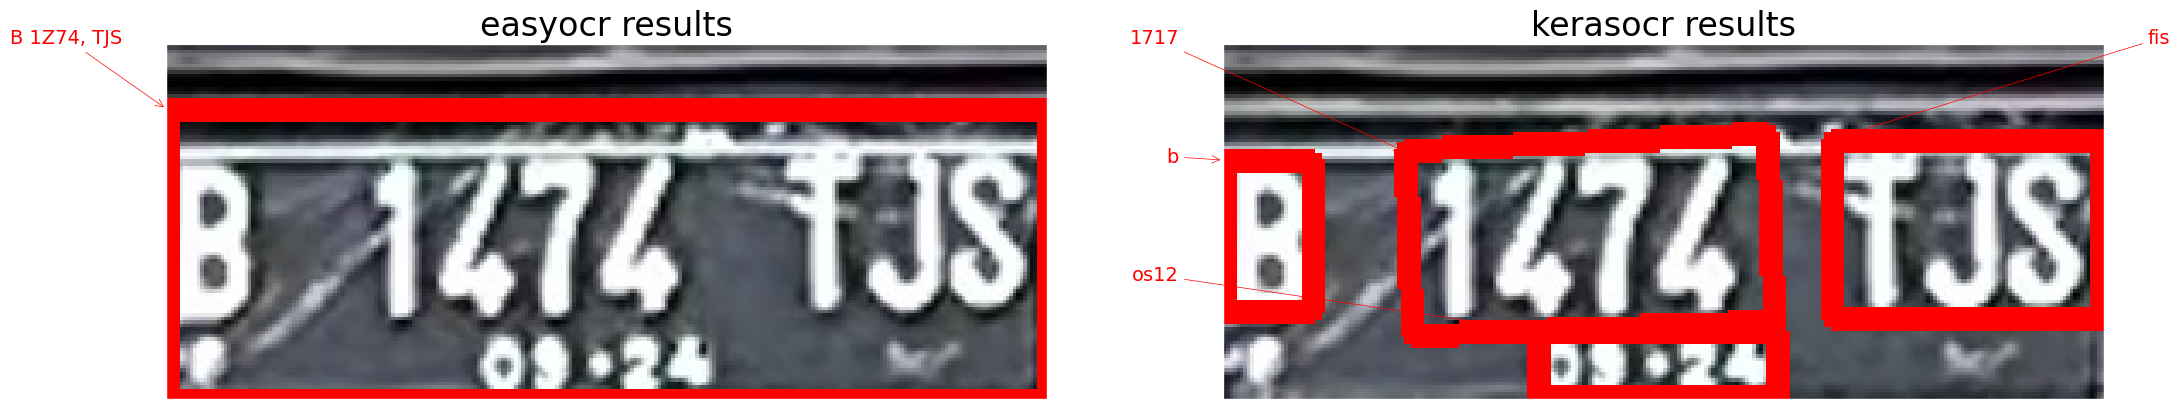

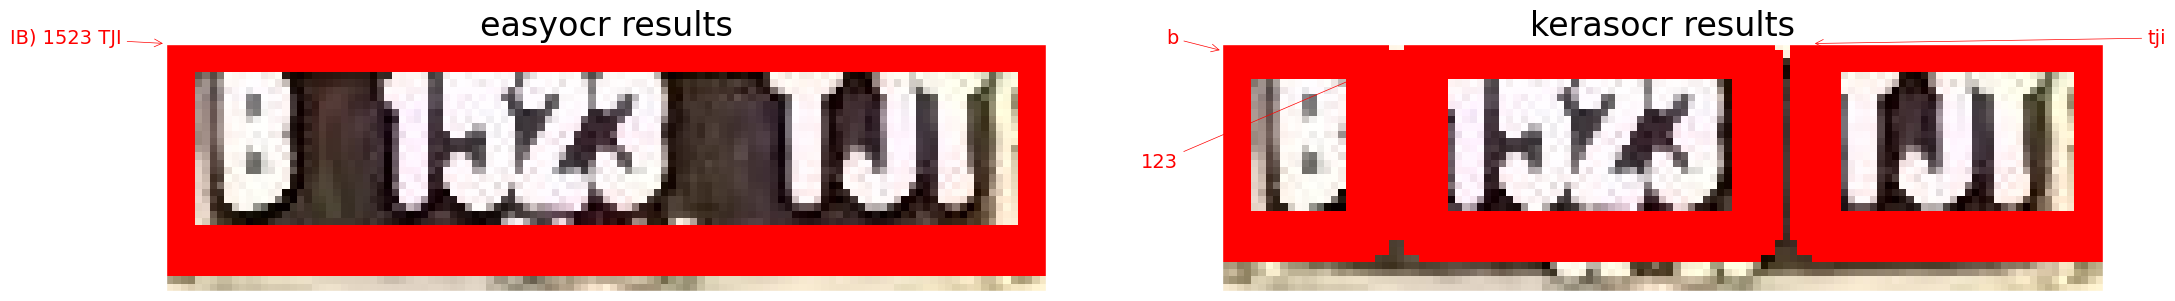

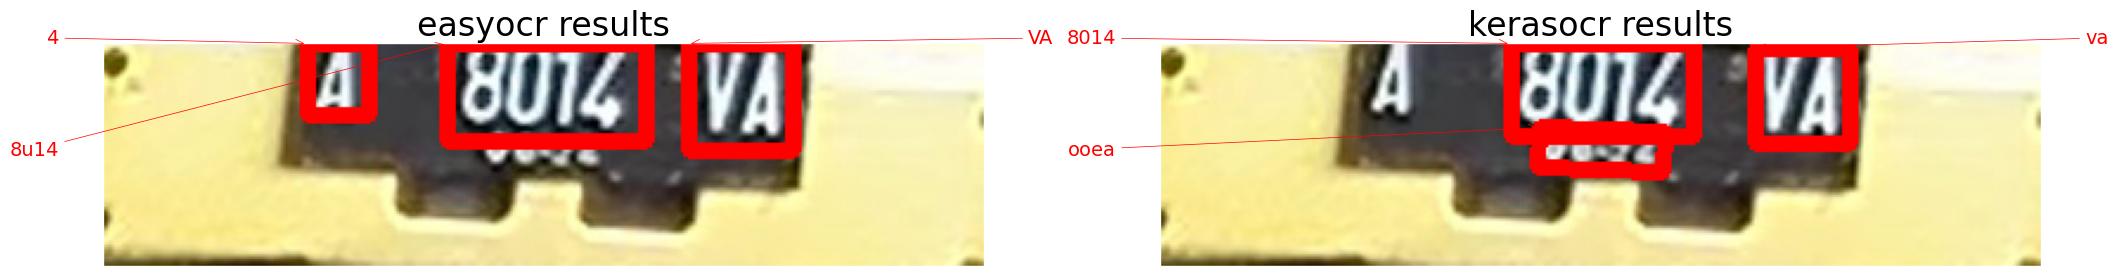

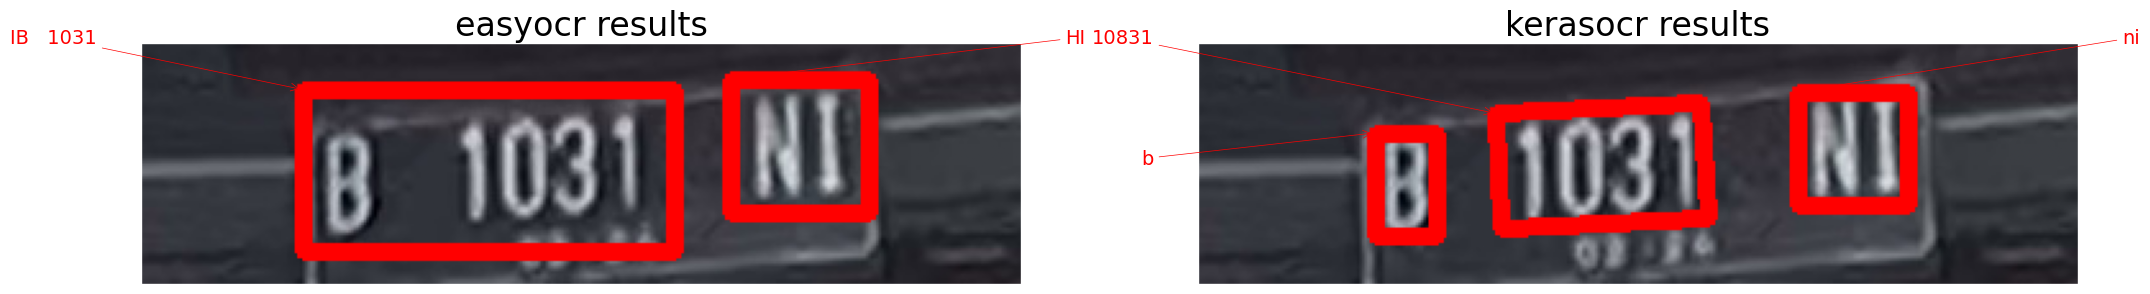

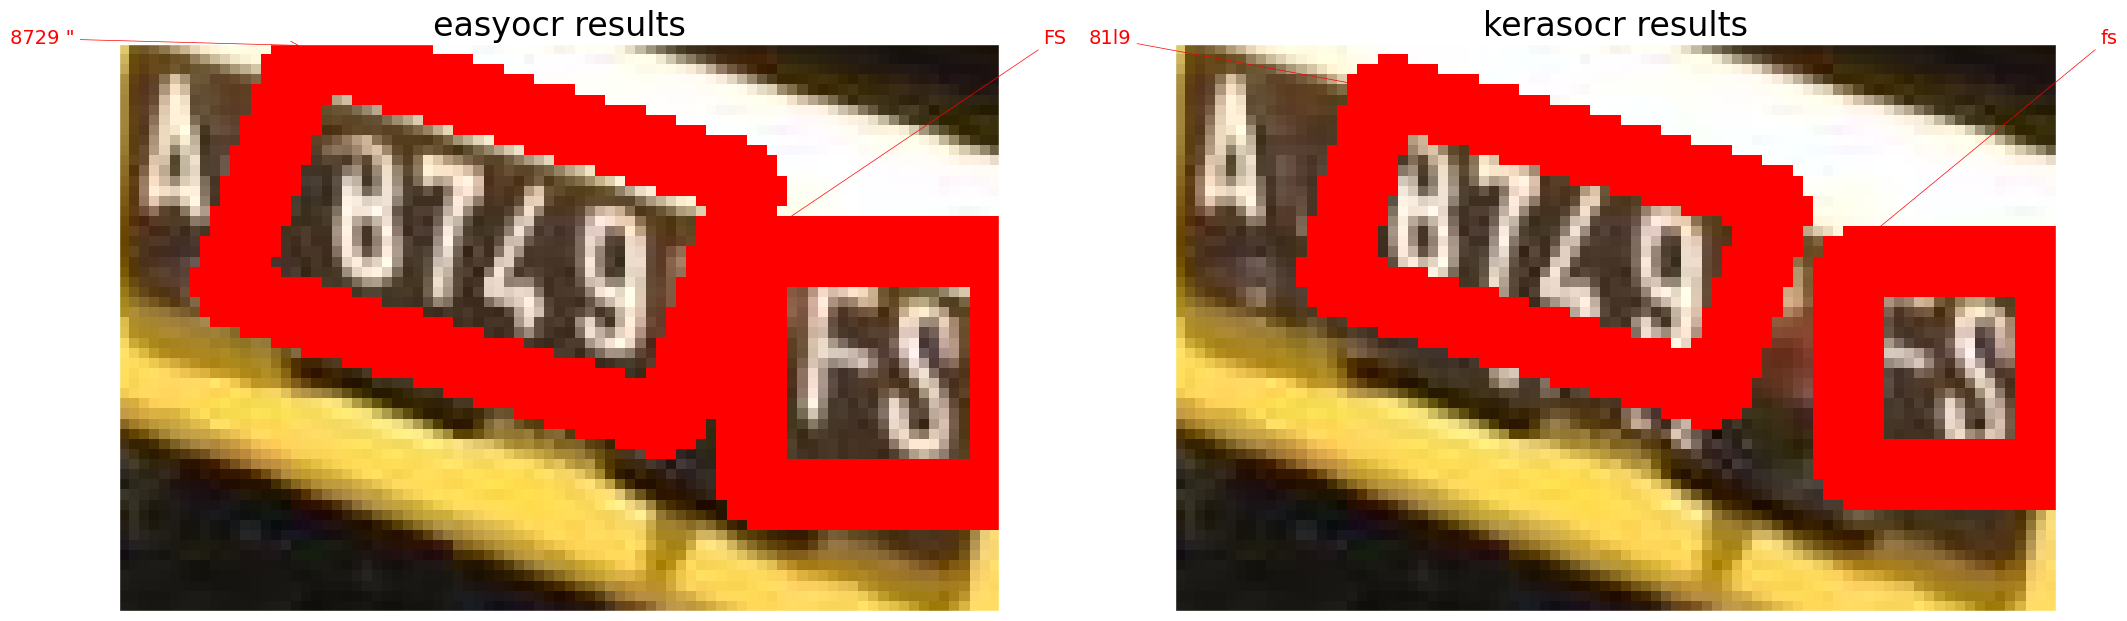

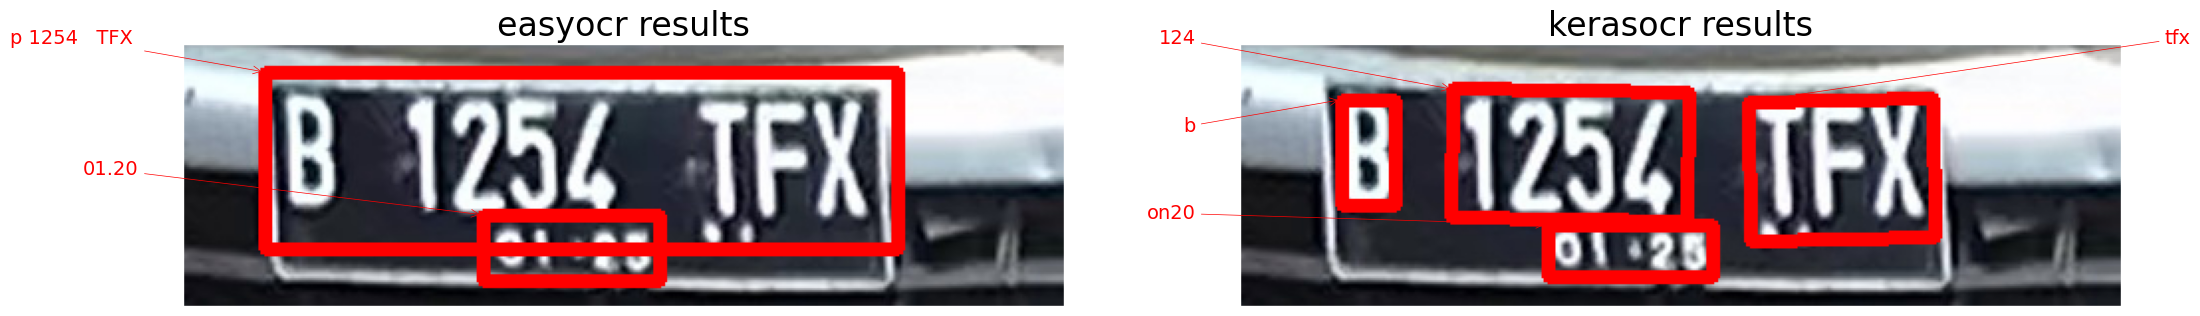

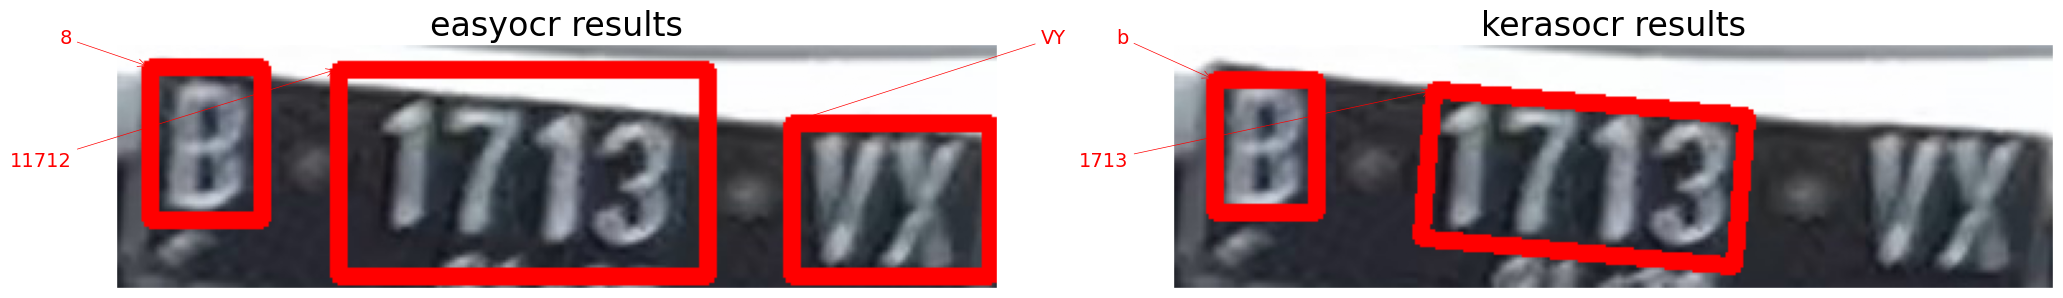

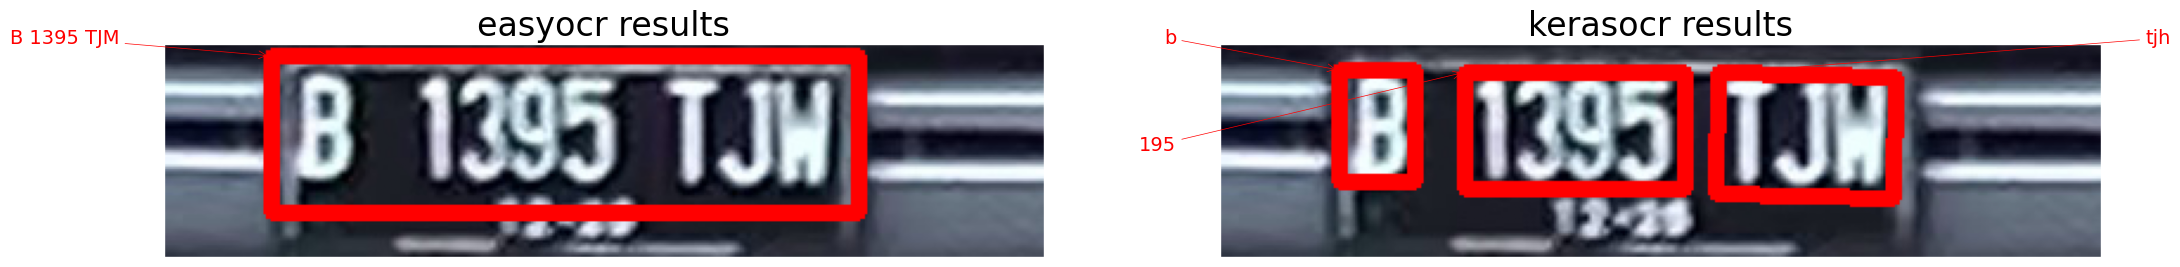

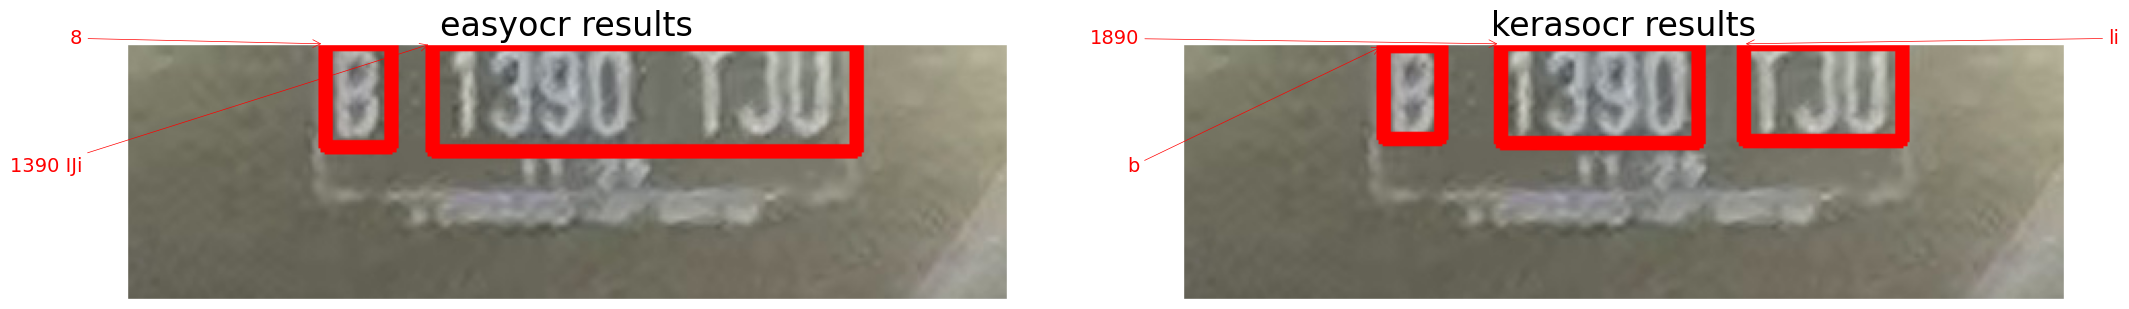

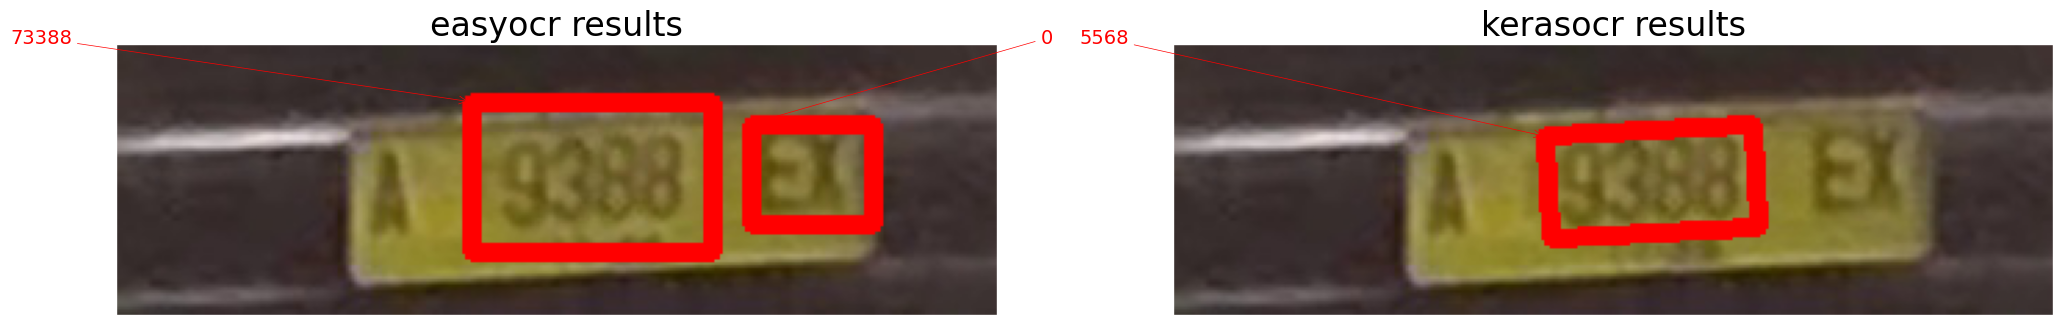

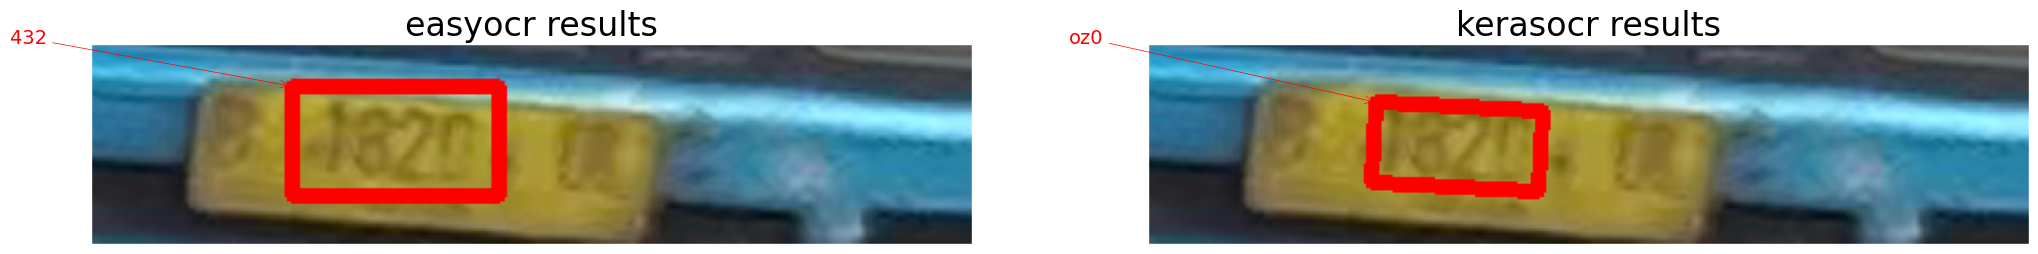

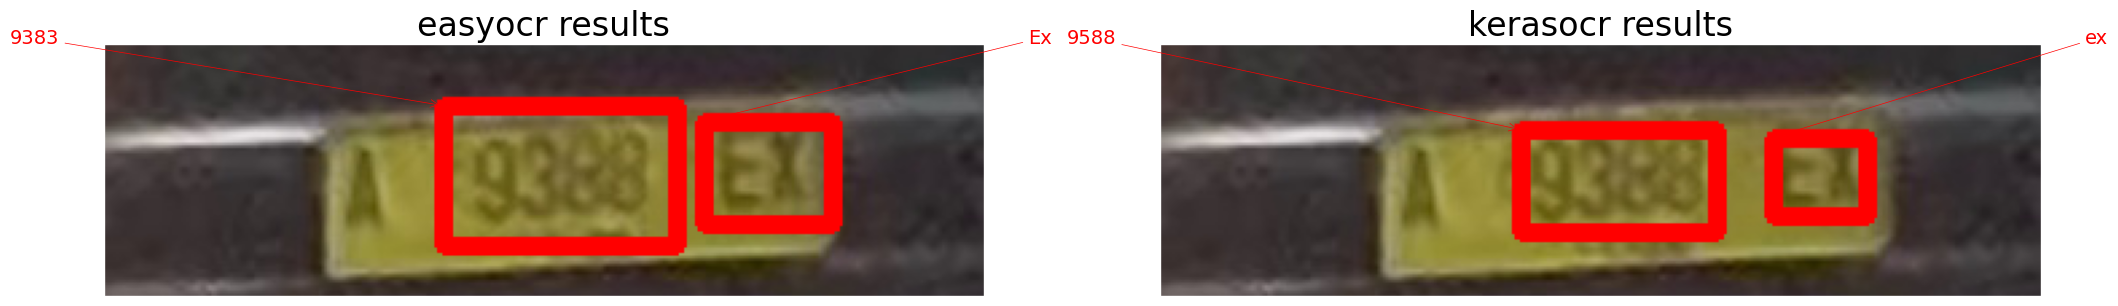

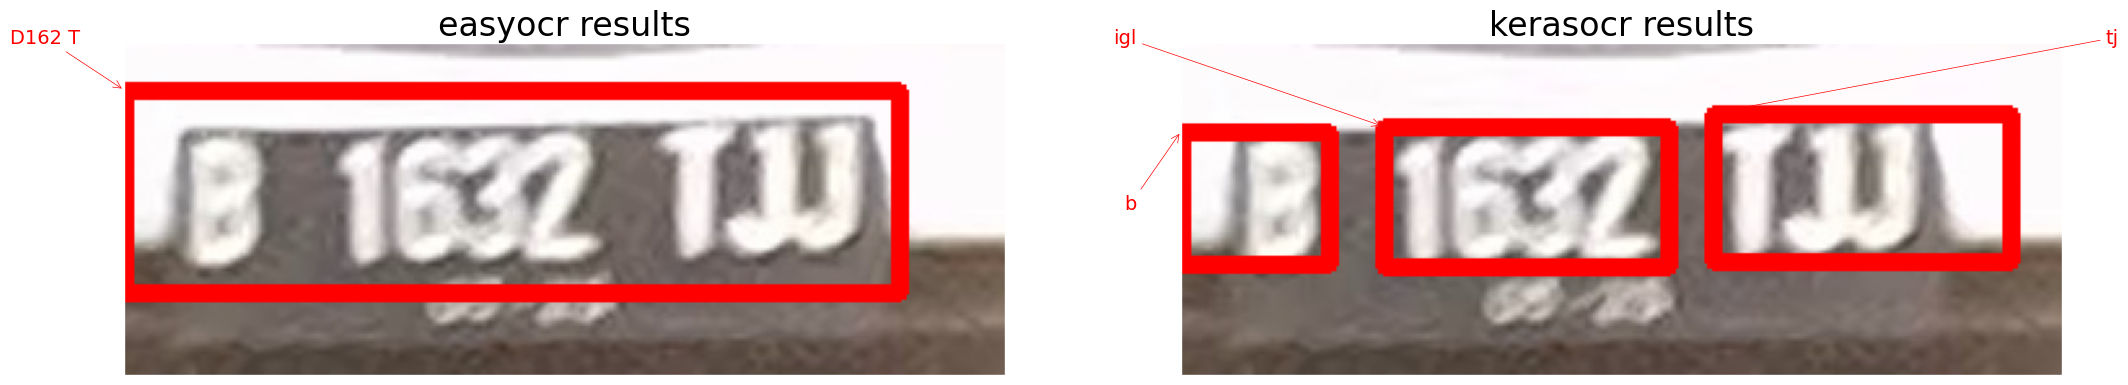

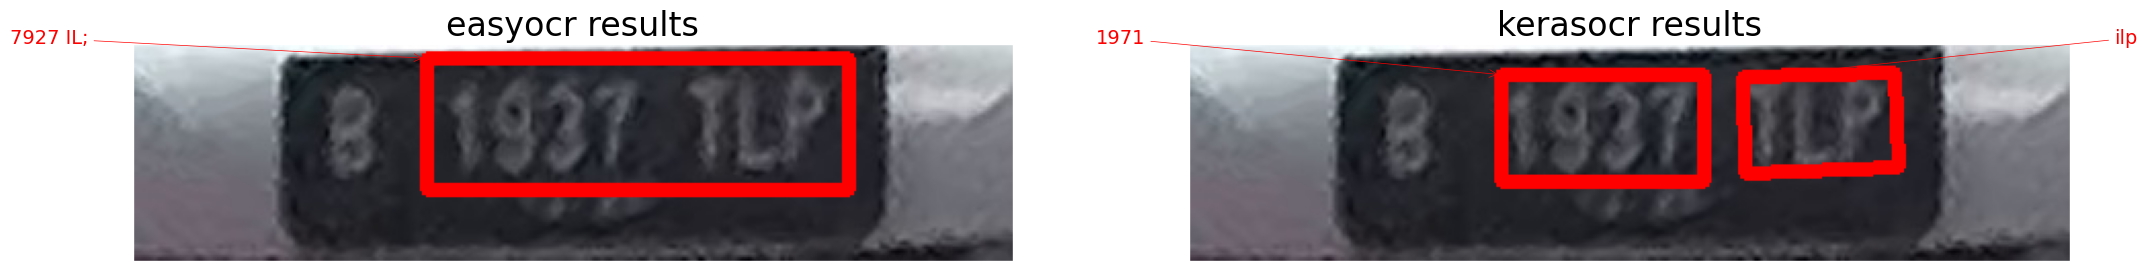

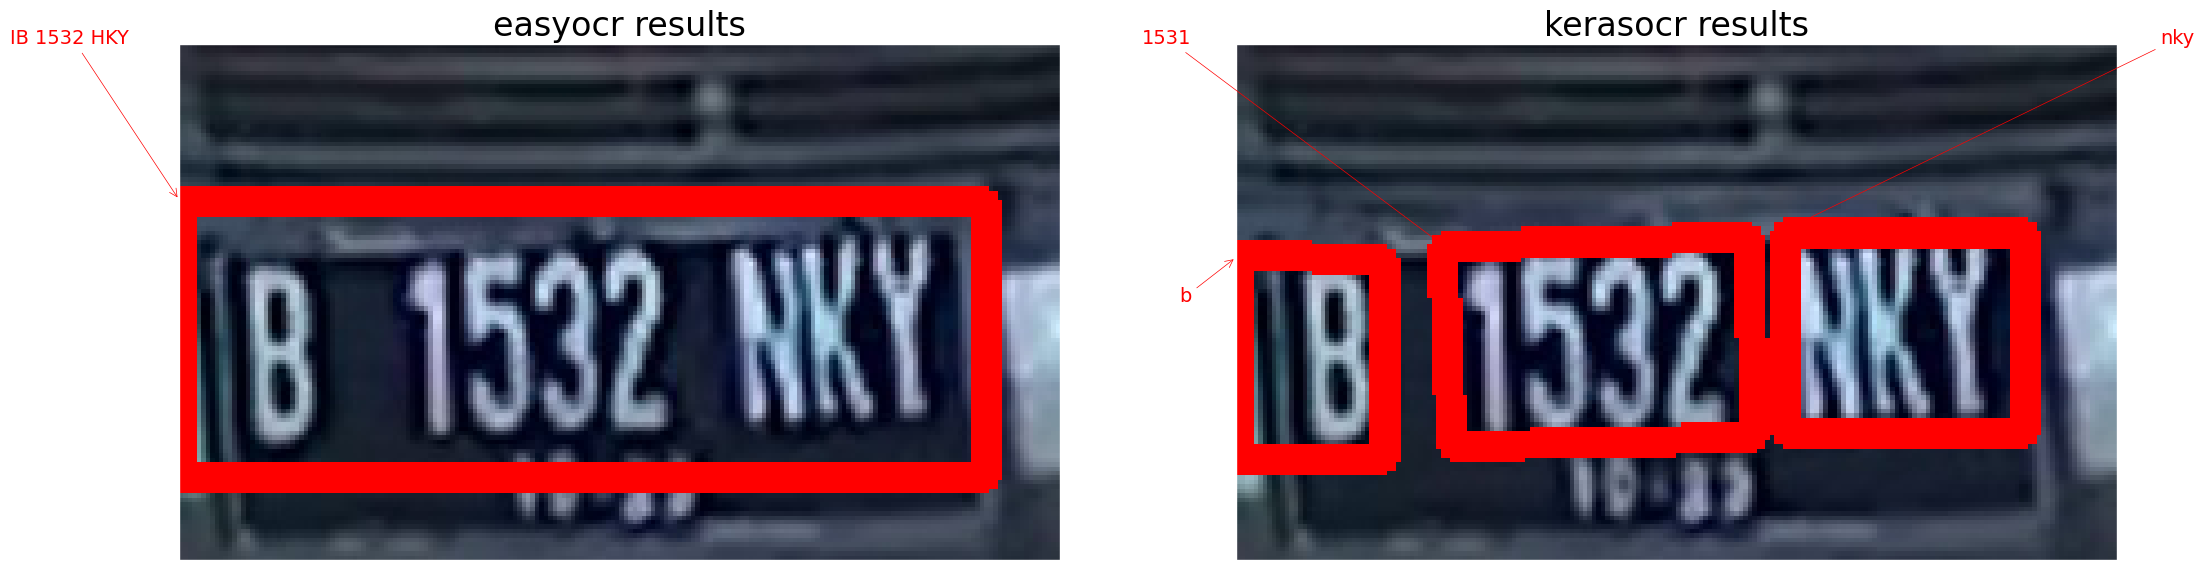

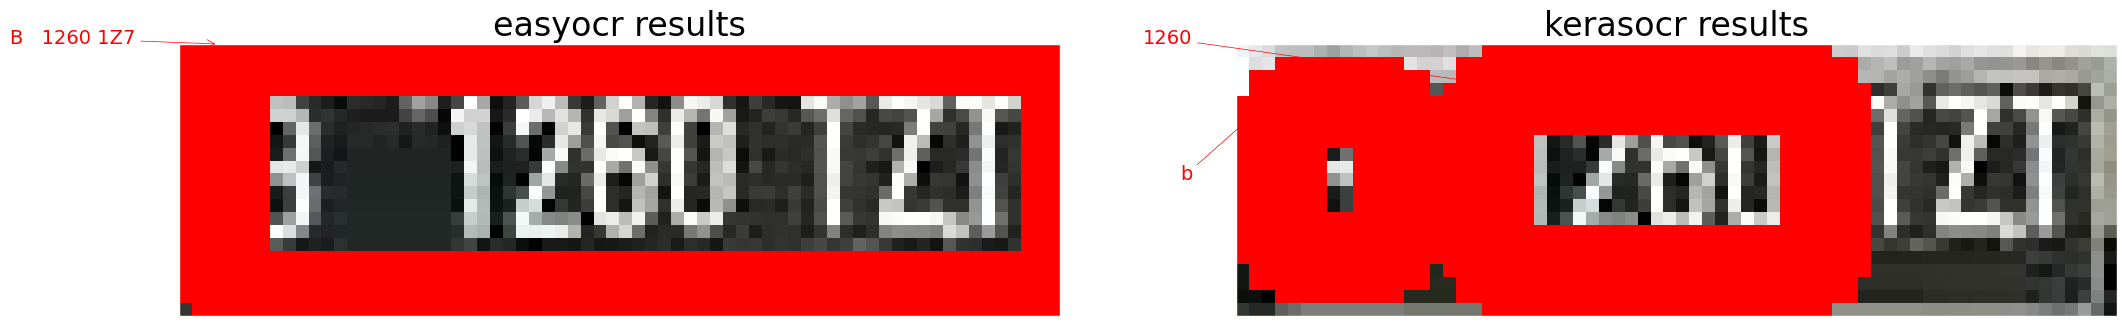

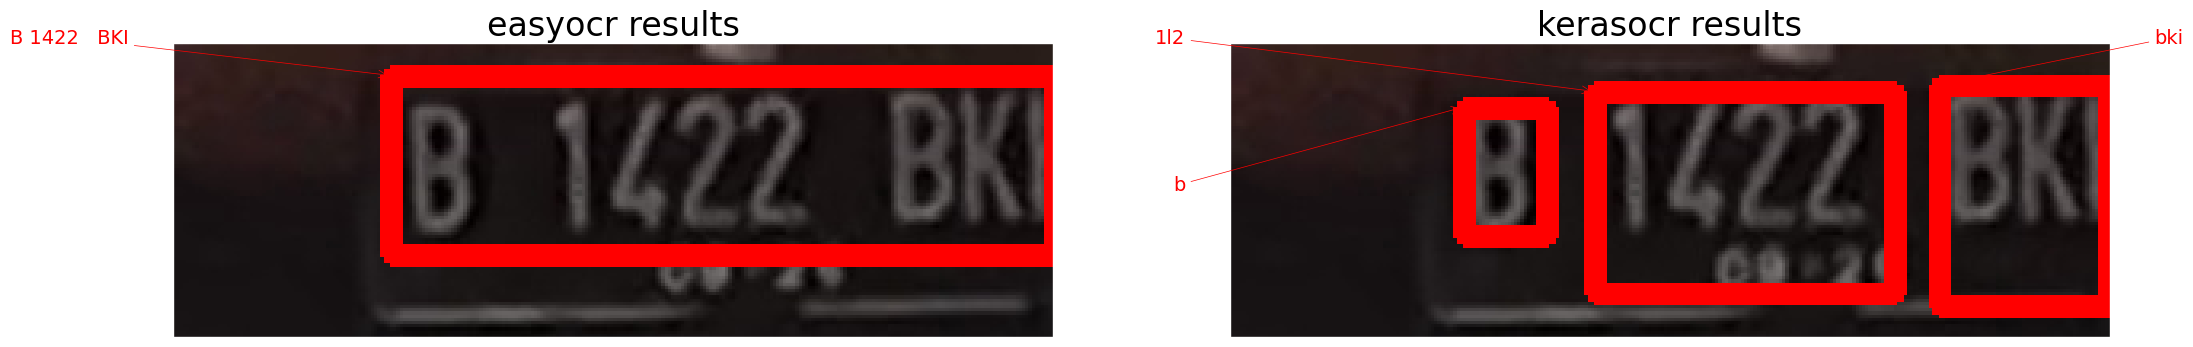

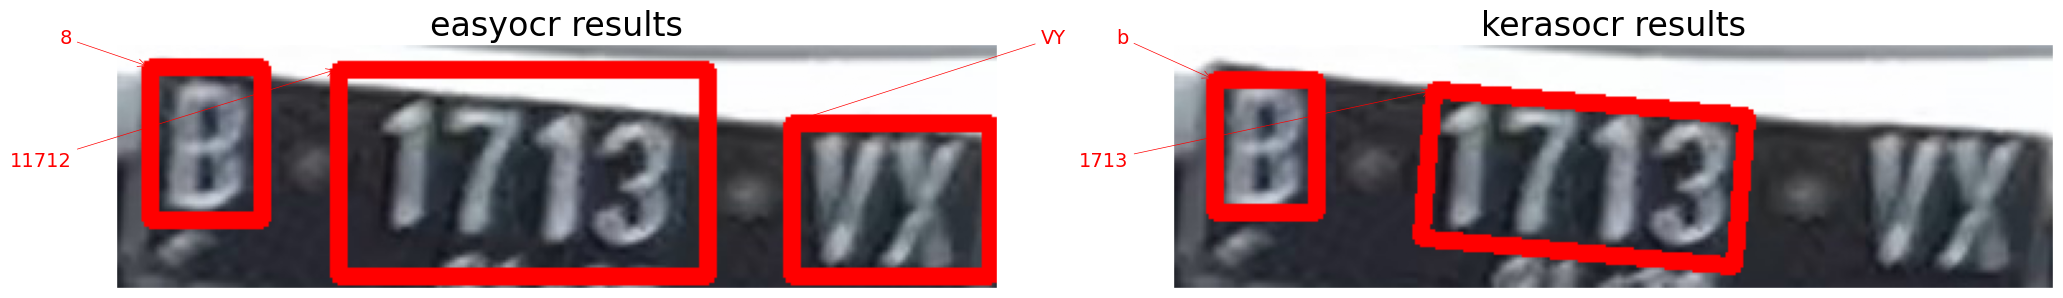

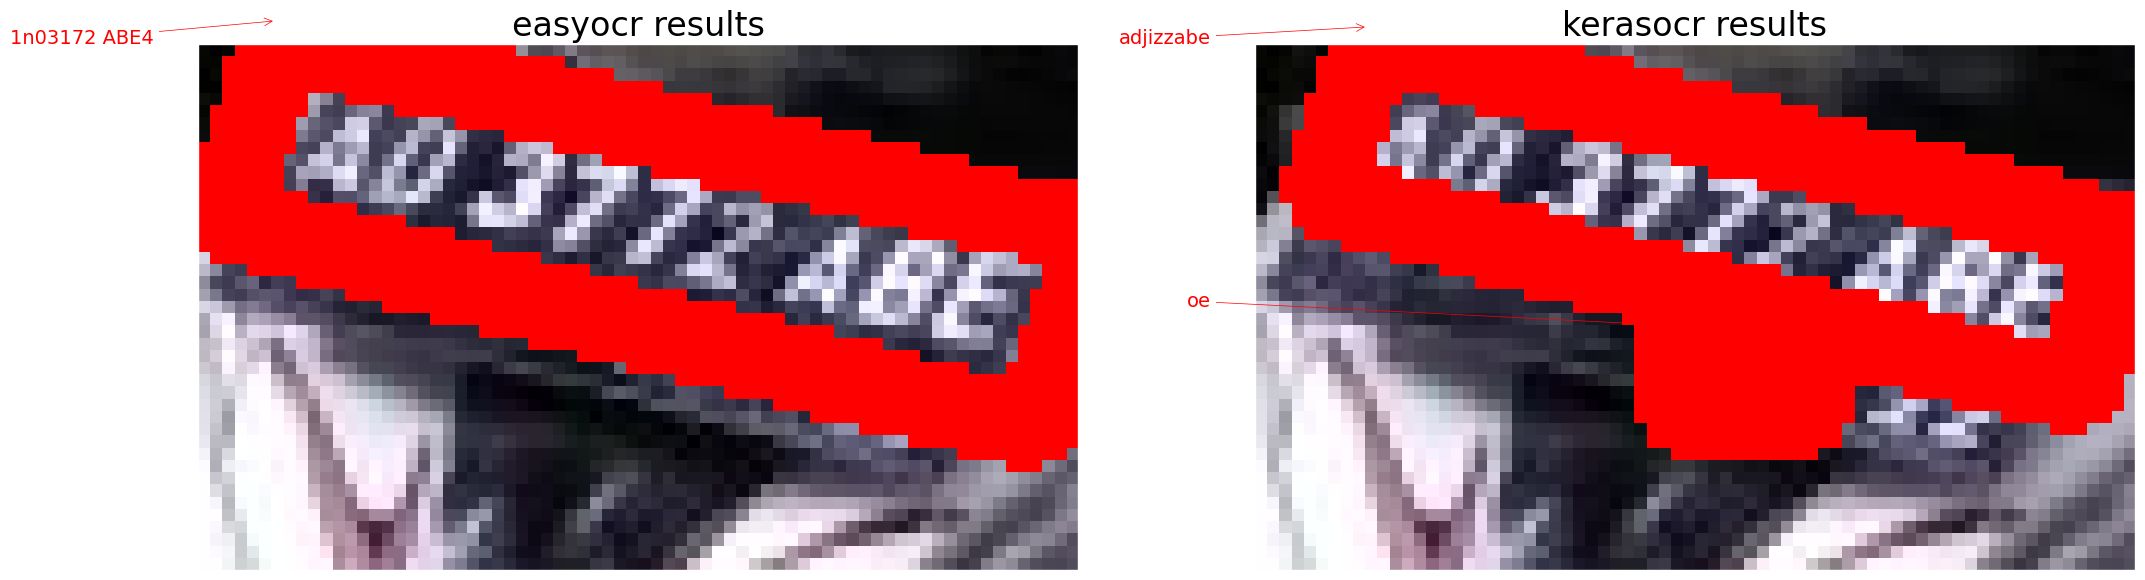

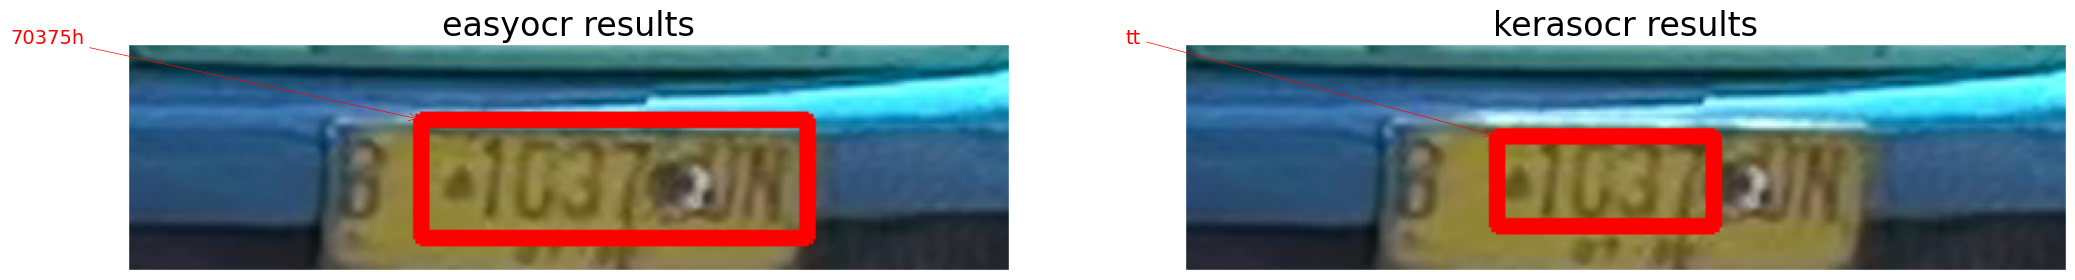

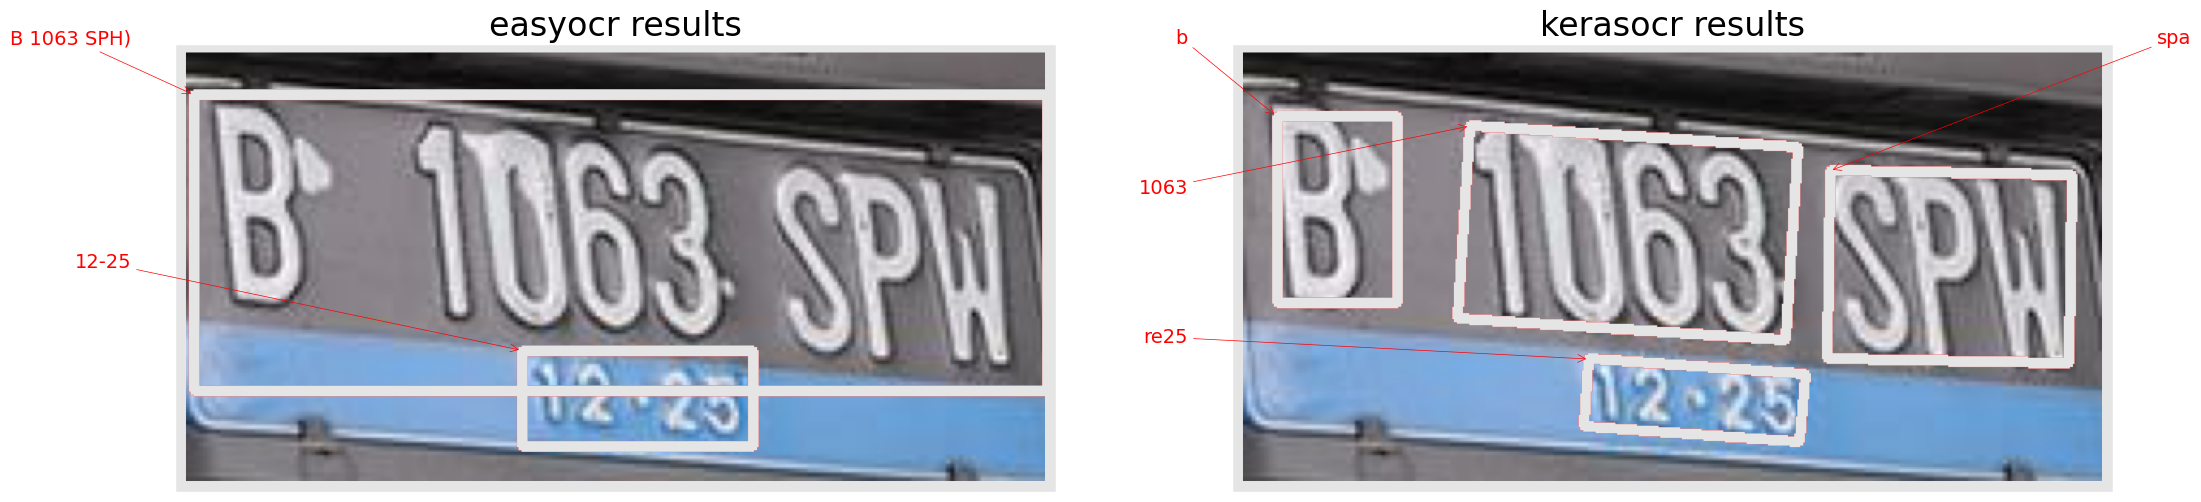

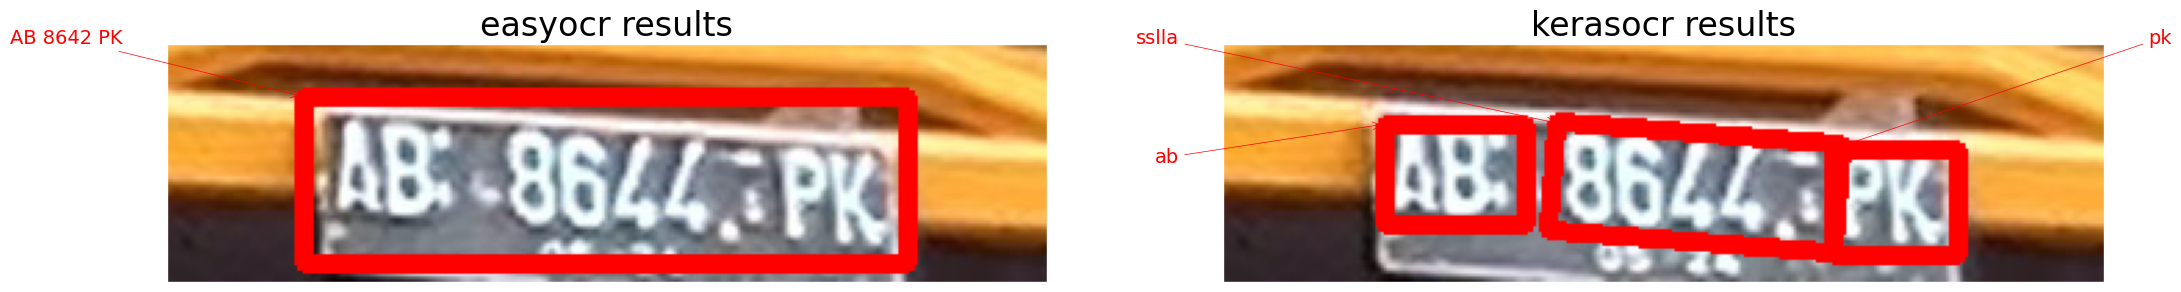

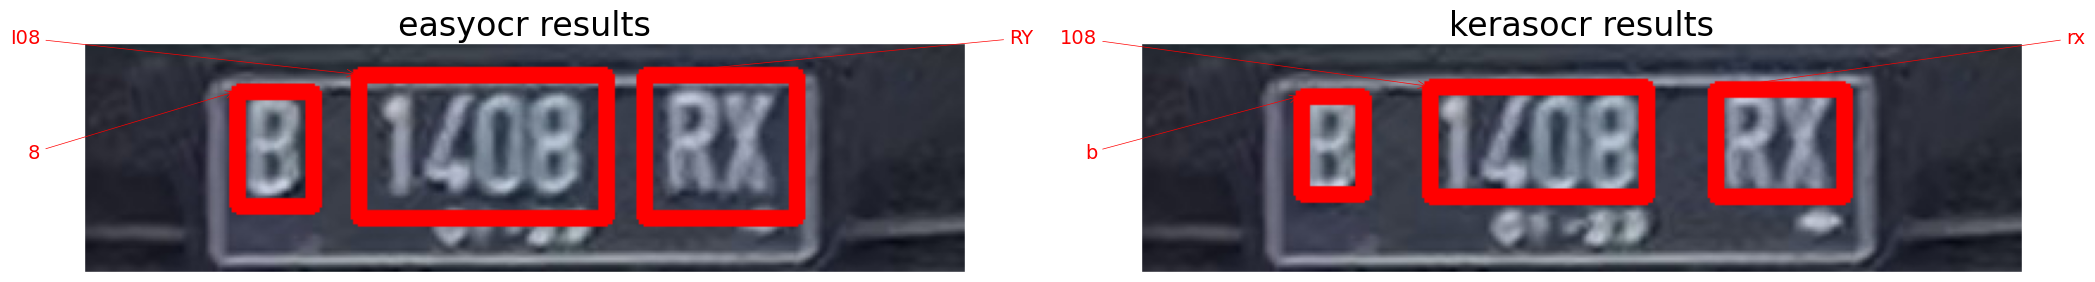

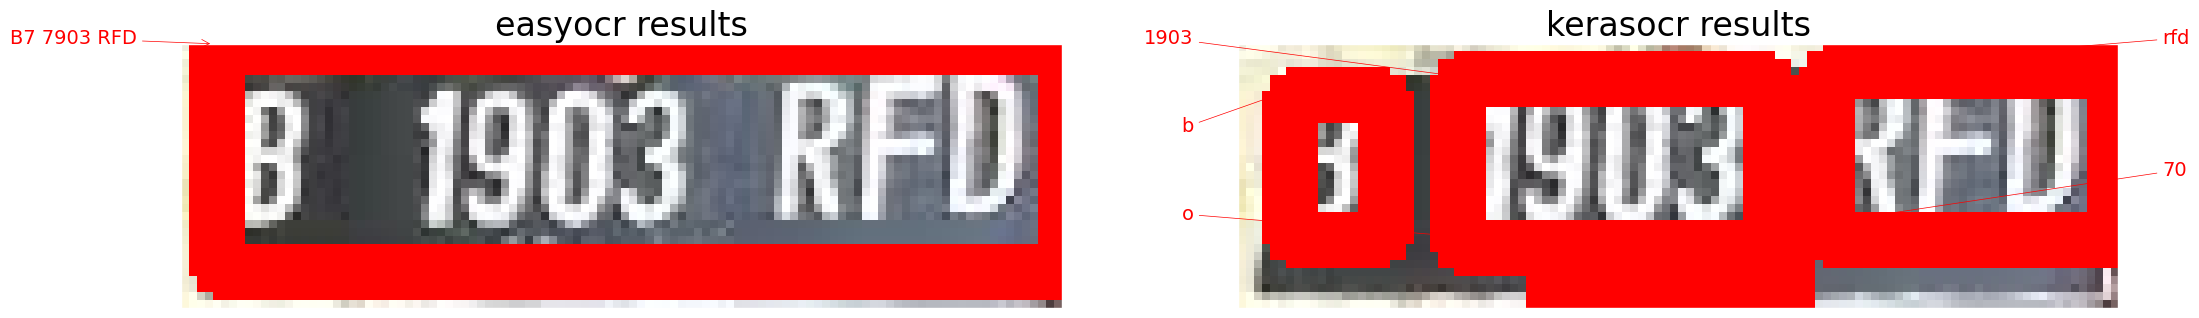

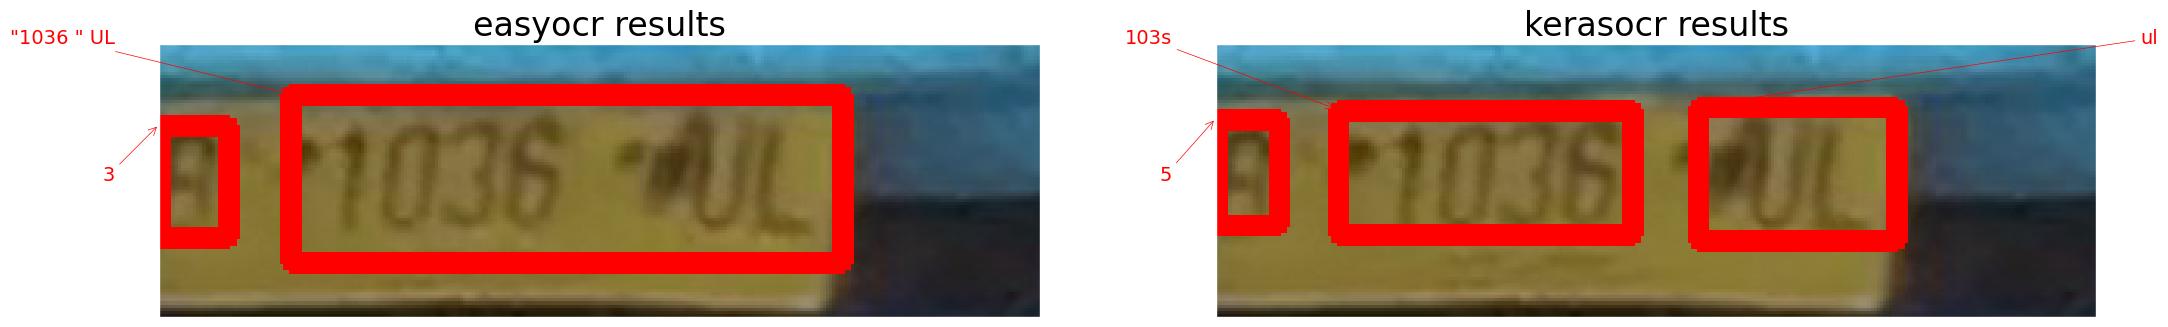

In [31]:
#Loop over results
for img_fn in img_fns[:25]:
    plot_compare(img_fn, easyocr_df, kerasocr_df)

In [32]:
submission = pd.read_csv("/kaggle/input/datatest/DataTest.csv", sep=";")
submission = submission.drop("Unnamed: 0", axis=1)
submission = submission.set_index("Name of File")
submission

Empty DataFrame
Columns: []
Index: [DataTest1.png, DataTest2.png, DataTest3.png, DataTest4.png, DataTest5.png, DataTest6.png, DataTest7.png, DataTest8.png, DataTest9.png, DataTest10.png, DataTest11.png, DataTest12.png, DataTest13.png, DataTest14.png, DataTest15.png, DataTest16.png, DataTest17.png, DataTest18.png, DataTest19.png, DataTest20.png, DataTest21.png, DataTest22.png, DataTest23.png, DataTest24.png, DataTest25.png, DataTest26.png, DataTest27.png, DataTest28.png, DataTest29.png, DataTest30.png, DataTest31.png, DataTest32.png, DataTest33.png, DataTest34.png, DataTest35.png, DataTest36.png, DataTest37.png, DataTest38.png, DataTest39.png, DataTest40.png, DataTest41.png, DataTest42.png, DataTest43.png, DataTest44.png, DataTest45.png, DataTest46.png, DataTest47.png, DataTest48.png, DataTest49.png, DataTest50.png, DataTest51.png, DataTest52.png, DataTest53.png, DataTest54.png, DataTest55.png, DataTest56.png, DataTest57.png, DataTest58.png, DataTest59.png, DataTest60.png, DataTest61.png, DataTest62.png, DataTest63.png, DataTest64.png, DataTest65.png, DataTest66.png, DataTest67.png, DataTest68.png, DataTest69.png, DataTest70.png, DataTest71.png, DataTest72.png, DataTest73.png, DataTest74.png, DataTest75.png, DataTest76.png, DataTest77.png, DataTest78.png, DataTest79.png, DataTest80.png, DataTest81.png, DataTest82.png, DataTest83.png, DataTest84.png, DataTest85.png, DataTest86.png, DataTest87.png, DataTest88.png, DataTest89.png, DataTest90.png, DataTest91.png, DataTest92.png, DataTest93.png, DataTest94.png, DataTest95.png, DataTest96.png, DataTest97.png, DataTest98.png, DataTest99.png, DataTest100.png]

[100 rows x 0 columns]

In [33]:
df_hasil

plate_easy
img_id                   
DataTest16.png   B1Z74TJS
DataTest77.png   IB1523TJ
DataTest57.png    48U14VA
DataTest65.png   IB1031HI
DataTest36.png     FS8729
...                   ...
DataTest99.png   BI5U9UML
DataTest12.png   81678HZH
DataTest92.png   AE3511T0
DataTest4.png    B16617KZ
DataTest17.png   8PU1939C

[100 rows x 1 columns]

In [34]:
df_hasil_keras

plate_keras
img_id                    
DataTest16.png    1717FISB
DataTest77.png     TJIB123
DataTest57.png    8014VAOO
DataTest65.png    NI10831B
DataTest36.png      81L9FS
...                    ...
DataTest99.png     BMSOOUN
DataTest12.png    D1610HZM
DataTest92.png    AB351EHL
DataTest4.png     TKZ1661B
DataTest17.png       DNPUE

[100 rows x 1 columns]

In [75]:
df_gabung = df_hasil.join(df_hasil_keras)
submission_fix = submission.join(df_gabung)
submission_fix = submission_fix.rename_axis('Name of File').reset_index()
submission_fix

Name of File plate_easy plate_keras
0     DataTest1.png   AD703LBE    DETO3ZAD
1     DataTest2.png      93683        5568
2     DataTest3.png   B16TB077    B16TBDZC
3     DataTest4.png   B16611KZ    TKZ1661B
4     DataTest5.png   40E0U3T1    ADJIZZAB
..              ...        ...         ...
95   DataTest96.png                       
96   DataTest97.png   AB8624PK    AB86LLYP
97   DataTest98.png   FAG9718E    EGAG9718
98   DataTest99.png    BP5O9UM     BMSOOUN
99  DataTest100.png   8I08RYWE      108RXB

[100 rows x 3 columns]

In [78]:
submission_fix.drop("plate_keras",axis=1)

Name of File plate_easy
0     DataTest1.png   AD703LBE
1     DataTest2.png      93683
2     DataTest3.png   B16TB077
3     DataTest4.png   B16611KZ
4     DataTest5.png   40E0U3T1
..              ...        ...
95   DataTest96.png           
96   DataTest97.png   AB8624PK
97   DataTest98.png   FAG9718E
98   DataTest99.png    BP5O9UM
99  DataTest100.png   8I08RYWE

[100 rows x 2 columns]

In [70]:
submission_fix.to_csv("submission "+" SD2023040000322.csv")

In [ ]:
submission.head(20)